# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases 
import pandas as pd

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

# print(north_df.isnull())
# display(north_df['Sale'].unique())
# display(south_df)


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
# EDA Question 1A solution below:
# print("north count=",len(
len(north_df['Rep ID'].unique())
# 245 calls in the north

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [3]:
# EDA Question 1B solution Below:
# print("south count=", len(south_df))
len(south_df['Rep ID'].unique())
# 314 calls in the south

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
# EDA Question 2A solution Below:
north_df.describe()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
# EDA Question 2B solution Below:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# EDA Question 3 solution Below:
# north_df.(['Time Block']=='9:00 AM').count
display(north_df.groupby(['Time Block']).agg('count'))

display(south_df.groupby(['Time Block']).agg('count'))


,Unnamed: 0,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,,,,,,,
10:00 AM,43,43,43,43,43,43,43,43,43,43,43,12,43,43
11:00 AM,25,25,25,25,25,25,25,25,25,25,25,7,25,25
12:00 PM,45,45,45,45,45,45,45,45,45,45,45,18,45,45
1:00 PM,17,17,17,17,17,17,17,17,17,17,17,5,17,17
2:00 PM,35,35,35,35,35,35,35,35,35,35,35,11,35,35
3:00 PM,30,30,30,30,30,30,30,30,30,30,30,12,30,30
4:00 PM,28,28,28,28,28,28,28,28,28,28,28,10,28,28
5:00 PM,17,17,17,17,17,17,17,17,17,17,17,4,17,17
9:00 AM,5,5,5,5,5,5,5,5,5,5,5,3,5,5


,Unnamed: 0,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,,,,,,,
10:00 AM,56,56,56,56,56,56,56,56,56,56,56,21,56,56
11:00 AM,31,31,31,31,31,31,31,31,31,31,31,12,31,31
12:00 PM,75,75,75,75,75,75,75,75,75,75,75,25,75,75
1:00 PM,23,23,23,23,23,23,23,23,23,23,23,10,23,23
2:00 PM,30,30,30,30,30,30,30,30,30,30,30,14,30,30
3:00 PM,43,43,43,43,43,43,43,43,43,43,43,20,43,43
4:00 PM,25,25,25,25,25,25,25,25,25,25,25,12,25,25
5:00 PM,26,26,26,26,26,26,26,26,26,26,26,10,26,26
9:00 AM,5,5,5,5,5,5,5,5,5,5,5,2,5,5


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


# EDA Question 2B solution Below:
- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [7]:
# Question 1 solution below

# display(north_df['Sale'].unique())
# display(north_df['Calls'].unique())

# display(south_df['Calls'].unique())
# display(south_df)
# north_df.isnull().sum()
# south_df.isnull().sum()

# There are null incoming wait times. This is accurate because the records are for outgoing calls.

<!-- #### Record your answer below:

> Your Answer: -->
<!-- There were null values in incoming call wait time. Those calls were outgoing calls so there would not be any incoming wait time. I left the data as is. -->

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [8]:
# Cleaning Question 2 solution below:

north_df['Sale'].replace("YES ", "YES",inplace=True)


display(north_df['Sale'].unique())

# I removed the trailing space in the values with "YES " with the replace command. I did this so all the yes values would be the same.

C:\Users\lisah\AppData\Local\Temp\ipykernel_16684\4204663773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  north_df['Sale'].replace("YES ", "YES",inplace=True)


array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer:  I removed the trailing space in the values with "YES " with the replace command. I did this so all the yes values would be the same.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [9]:
# Cleaning Question 3 solution below:
# north_df.duplicated().sum()
# south_df.duplicated().sum()
display(north_df.duplicated().count())
display(south_df.duplicated().count())

# display(south_df.count())

# dupes_n=north_df.duplicated
# dupes_s=south_df.duplicated()

# display(dupes_n)
# # display(dupes_s)

np.int64(245)

np.int64(314)

##### Record your answer below:
> Your Answer: I did not find any duplicate data.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [10]:
# Cleaning Question 4 solution below:
# display(north_df)
# sales=north_df[north_df['Sale']=="YES"]
# display(sales)
# display(north_df['Calls'].unique())
# display(south_df['Calls'].unique())

# north_df.drop(columns=['Calls'],inplace=True)
# south_df.drop(columns=['Calls'],inplace=True)
display(north_df)
display(south_df)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


##### Record your answer below:
> Your Answer: In both sets of data the calls field only contains a value of 1. I would drop the column from both dataframes using the drop command but I found that later in the visualization, the column is used.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [11]:
# # Create dataframe for the entire company named df

df = pd.concat([north_df,south_df])


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [12]:
# Manipulation Question solution below:
df.groupby(['Rep ID','Branch']).sum('Calls').sort_values('Calls',ascending=False)

,,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,,
Brent,North,4840,0,1,362,71,17.0,117,37
Eric,South,5039,0,0,361,54,47.0,112,35
Randy,South,4576,3,1,320,66,47.0,98,33
Sandy,South,4694,1,0,325,60,34.0,100,32
Helga,South,5236,0,2,292,58,36.0,95,31
Lilly,North,3375,0,2,307,59,37.0,88,30
George,South,4620,0,0,298,53,41.0,87,29
Kate,South,4615,0,0,291,61,37.0,83,29
Todd,North,4252,1,0,296,58,21.0,97,29


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37 calls
- South Branch = Eric 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [13]:
# Manipulation Question 2 solution below:
abandon_df=df.groupby('Branch').mean('Abandoned')
display(abandon_df)

# abandon_df=df.mean('Abandoned')
display(df['Abandoned'].mean())


# display(abandon_df)
# pvt_tbl=df.pivot_table(values='Abandoned',aggfunc='mean',index=['Branch'],columns='calls')
# display(pvt_tbl)
# pivot_table = data.pivot_table(values='fare', aggfunc='sum', index=['who','age_group'],columns='survived')


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,,
North,122.0,0.020408,0.028571,9.987755,1.914286,3.04878,2.967347,1.0
South,156.5,0.035032,0.012739,10.054140,1.910828,3.00000,3.076433,1.0


np.float64(0.01967799642218247)

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide =1.97%
- Do any of these fall out of the optimal range of 2-5%?
Yes, South and company wide do fall out of the optimal range. They are lower than the optimal while the North Branch falls into the optimal range.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [14]:
# Manipulation Question 3 solution below:
# efficiency_df=df.groupby('Branch')[('Incoming Wait Time')].count()
# # ideal_df=ideal_df.groupby('Branch')[('Incoming Wait Time')].count()
# # df['Ideal']=df[df['Incoming Wait Time'] <=2]

def under_2_wait(data):
    wait = data['Incoming Wait Time']
    if wait <= 2 :
        return 1
    else:
        return 0

df["under_2_wait"] = df.apply(under_2_wait, axis=1)

efficiency_df=df.groupby("Branch").agg("sum")
# display(efficiency_df)

aggregate_dictionary_example = {
    "Incoming Wait Time": ["count"], 
    "under_2_wait": ["sum"]
}

dictionary_aggregate = df.agg(aggregate_dictionary_example)
total_calls=df.agg('Incoming Wait Time').count()
ideal_incoming=df[df['Incoming Wait Time'] <=2].agg('Incoming Wait Time').count()
display(ideal_incoming)
display((ideal_incoming/total_calls)*100)

dictionary_aggregate = df.groupby('Branch').agg(aggregate_dictionary_example)
display(dictionary_aggregate)

def calc_ideal(data):
    calc=(data[1]/data[0]) * 100
    print(calc)
    return calc
    
dictionary_aggregate['ideal']= dictionary_aggregate.apply(calc_ideal,axis=1)

display(dictionary_aggregate)

np.int64(81)

np.float64(38.94230769230769)

,Incoming Wait Time,under_2_wait
,count,sum
Branch,,
North,82,33
South,126,48


40.243902439024396
38.095238095238095


C:\Users\lisah\AppData\Local\Temp\ipykernel_16684\866630841.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calc=(data[1]/data[0]) * 100


,Incoming Wait Time,under_2_wait,ideal
,count,sum,
Branch,,,
North,82,33,40.243902
South,126,48,38.095238


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 calls
- South Branch = 30.10%, 48 calls
- Company Wide = 38.94%, 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [15]:
# Manipulation Question 4 solution below:
speed_df=df.agg("Incoming Wait Time").mean()
display(speed_df)

speed_df=df.groupby('Branch').agg('Incoming Wait Time').mean()
display(speed_df)

np.float64(3.019230769230769)

Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\lisah\AppData\Local\Temp\ipykernel_16684\488650823.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i] )


Text(0, 0.5, 'Abandonment rates')

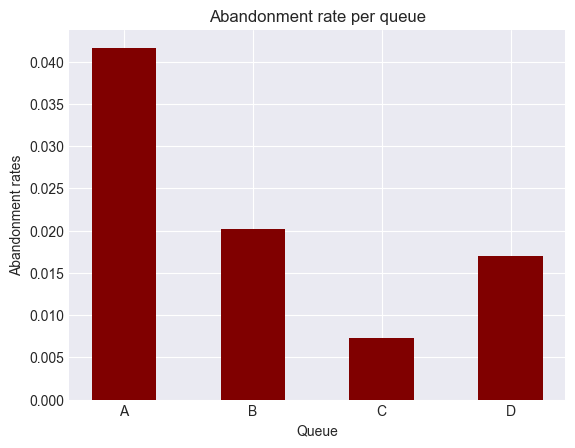

In [28]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style 
import numpy as np

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i] )

#Your code below:
# plt.bar(x=abandonment_rates.keys(), height=abandonment_rates.values(),width=.4, color ='maroon')
plt.bar(x=abandonment_rates.keys(), height=abandonment_rates.values(), width=.5, color ='maroon')
plt.title("Abandonment rate per queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment rates")



##### Record your answer below:

> Chart style you chose and why: I chose a column chart. With only four values on the x-axis, it is visually easy to see how the average abandonment rate plots over the four queues.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

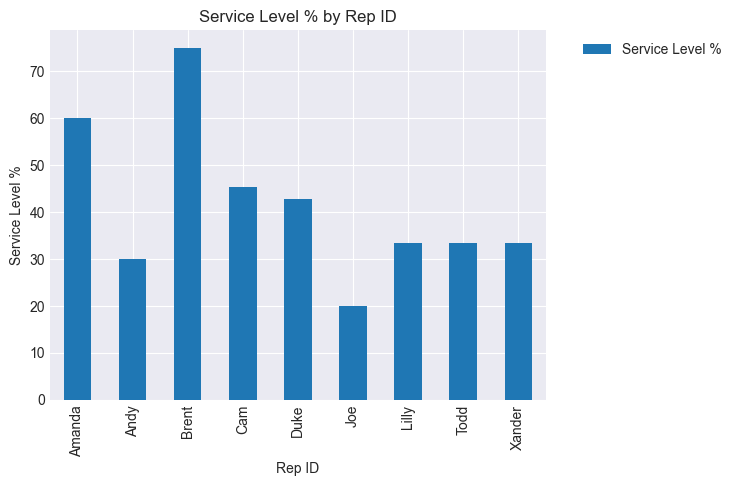

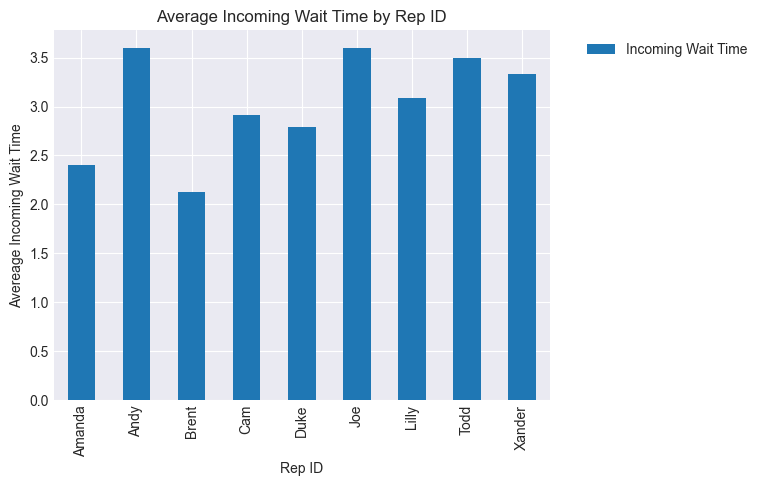

In [23]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
chart_df=pd.merge(service_level,north_plt,on="Rep ID")
# chart_df[['Rep ID','Service Level %','Incoming Wait Time']].plot(x="Rep ID",kind="bar",title="Service Level % and Average Wait Time by Rep ID")

plt.style.use('seaborn-v0_8-darkgrid')

chart_df[["Rep ID", "Service Level %"]].plot(x="Rep ID",kind="bar",title="Service Level % by Rep ID",ylabel="Service Level %")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


chart_df[["Rep ID","Incoming Wait Time"]].plot(x="Rep ID",kind="bar",title="Average Incoming Wait Time by Rep ID",xlabel="Rep ID",ylabel="Avereage Incoming Wait Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()



##### Record your answer below:

> Chart style you chose and why: I chose a two column charts so that you are able to see both service level% and incoming wait time by rep. I also created a grouped bar chart but found the the numbers were so far apart that it wasn't as productive.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


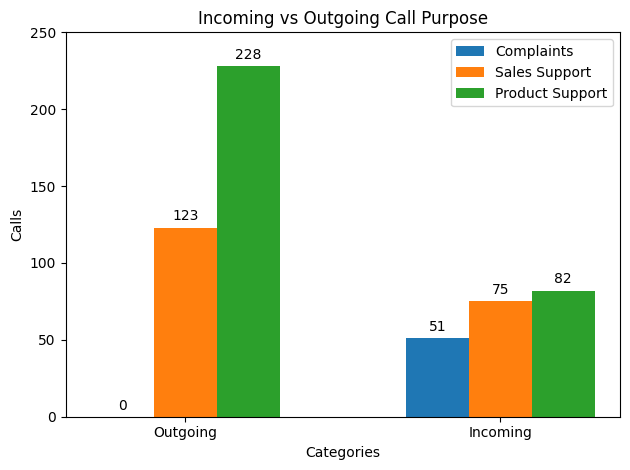

In [18]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


#Your Code Here:
# display(complaints)
# display(sales_support)
# display(product_support)

comp={'Outgoing':0}

merged_compl=comp |complaints

calls = {
    'Complaints':merged_compl,
    'Sales Support':sales_support,
    'Product Support':product_support
}

# Extract groups and categories
groups = list(calls.keys())
categories = list(calls[groups[1]].keys())

# Number of groups and categories
n_groups = len(groups)
n_categories = len(categories)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.2

# Set the opacity
opacity = 0.8

# Set the positions of the bars on the x-axis
index = np.arange(n_categories)

# Plot bars for each group
for i, group in enumerate(groups):
    values = list(calls[group].values())
    offset = bar_width 
    # * multiplier
    rects = ax.bar(index + i * bar_width, values, bar_width, label=group)
    ax.bar_label(rects, padding=3)
    # plt.bar(index + i * bar_width, values, bar_width, alpha=opacity, label=group)
    
# Set the labels and title
plt.xlabel('Categories')
plt.ylabel('Calls')
plt.title('Incoming vs Outgoing Call Purpose')
plt.xticks(index + bar_width * (n_groups - 1) / 2, categories)
plt.ylim(0,250)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose a grouped column chart. By looking at the incoming and outgoing grouped together, you are able to compare which type produced the most/least calls.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 

Each branch has a similar incoming wait time. The south branch has a lower abandoment rate. The North is still within the company's acceptable range. North is operating with fewer reps. The 9 north reps average 27.22 calls and the 11 south reps average 28.54 calls. Based on these averages, I would say the south is operating more efficiently but it is close.

In [55]:

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

display(north_plt)
display(south_plt)

display(service_level)



# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
south_service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
south_service_level["Service Level %"] = south_service_level["Calls_x"]/service_level["Calls_y"] * 100
display(south_service_level)

# north_plt=north_df.agg("Incoming Wait Time").mean()

# south_plt=south_df.agg("Incoming Wait Time").mean()
# south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()
# display(north_plt.sort_values("Incoming Wait Time",ascending=True))
# display(south_plt.sort_values("Incoming Wait Time",ascending=True))


,Rep ID,Incoming Wait Time
0,Amanda,2.400000
1,Andy,3.600000
2,Brent,2.125000
3,Cam,2.909091
4,Duke,2.785714
5,Joe,3.600000
6,Lilly,3.083333
7,Todd,3.500000
8,Xander,3.333333


,Rep ID,Incoming Wait Time
0,Alice,2.500000
1,Eric,2.611111
2,George,3.153846
3,Helga,3.272727
4,Josh,3.444444
5,Karl,2.888889
6,Kate,3.363636
7,Randy,2.937500
8,Sandy,2.615385
9,Sharon,3.625000


,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


,Calls_x,Calls_y,Service Level %
Rep ID,,,
Alice,3,6,NaN
Eric,10,18,NaN
George,4,13,NaN
Helga,3,11,NaN
Josh,2,9,NaN
Karl,3,9,NaN
Kate,3,11,NaN
Randy,7,16,NaN
Sandy,7,13,NaN


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: The north branch could benefit from the extra help. Each rep averages fewer calls than the reps in the south.

In the North branch, Brent is an outlier. His performance is the only north rep in the top 8 of reps. If his performance is removed, the north would definitely need additional help.
South has better averages on abandoned calls, not ready minutes and incoming wait time.
North has better averages on lost calls, busy minutess and during call wait time


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Payroll data would be useful to analyize which branch is performing better. In the north, Brent outpaces his fellow reps but how much is he being paid. You could analyze the performance of the reps to the amount spent on the payroll.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: I chose a grouped column chart. 

<Axes: xlabel='Call Purpose', ylabel='Calls'>

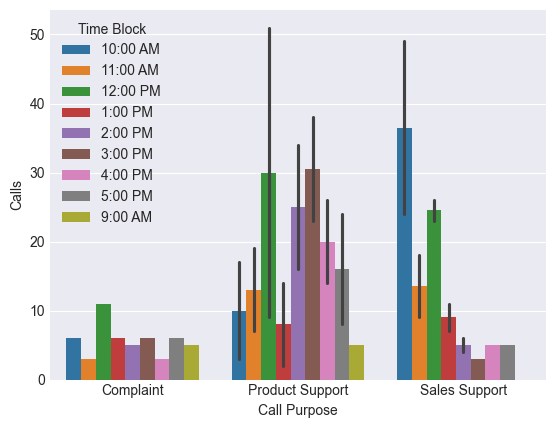

In [81]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
# north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

call_plt=call_times.groupby(['Call Purpose','Time Block','Incoming or Outgoing'])['Calls'].count().to_frame().reset_index()
# display(call_plt)

sb.barplot(data=call_plt, x='Call Purpose', y='Calls', hue='Time Block')
# Use groupby and get_group to select which call purpose to plot: